# Importación de Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Lectura de Archivo

In [2]:
data= pd.read_csv('customer_dataset.csv')


In [7]:
data.head(100)

,orderAmount,orderState,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,paymentMethodIssuer,transactionAmount,transactionFailed,fraudulent,samecity,samestate,emailDomain,emailProvider,customerIPAddressSimplified
0,18.0,pending,True,card,JCB 16 digit,Citizens First Banks,18,False,False,yes,yes,com,yahoo,only_letters
1,26.0,fulfilled,True,bitcoin,VISA 16 digit,Solace Banks,26,False,True,no,no,com,yahoo,only_letters
2,45.0,fulfilled,False,card,VISA 16 digit,Vertex Bancorp,45,False,False,no,no,com,yahoo,digits_and_letters
3,23.0,fulfilled,False,card,Diners Club / Carte Blanche,His Majesty Bank Corp.,23,False,False,no,no,com,yahoo,digits_and_letters
4,43.0,fulfilled,False,card,Mastercard,Vertex Bancorp,43,True,True,no,no,com,other,only_letters
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,15.0,fulfilled,True,card,Maestro,His Majesty Bank Corp.,38,False,False,no,no,com,hotmail,only_letters
96,46.0,fulfilled,False,card,Voyager,Fountain Financial Inc.,12,True,True,no,no,biz,other,digits_and_letters
97,18.0,fulfilled,False,card,JCB 16 digit,Her Majesty Trust,12,True,True,unknown,unknown,com,hotmail,only_letters
98,30.0,failed,False,card,JCB 16 digit,Vertex Bancorp,12,False,True,no,no,com,gmail,digits_and_letters


In [107]:
# sumatoria de valores nulos por columna
data.isnull().sum()[data.isnull().sum() > 0]

orderAmount                         145
orderState                          145
paymentMethodRegistrationFailure    281
paymentMethodType                   281
paymentMethodProvider               281
paymentMethodIssuer                 281
fraudulent                          455
dtype: int64

# AED 1 🤓

## Análisis de variables categóricas 

### Variable paymentMethodType

In [108]:
# Datos nulos
data['paymentMethodType'].isnull().sum()

281

In [109]:
# porcentaje de datos nulos
data['paymentMethodType'].isnull().sum() / len(data) *100

45.10433386837881

In [110]:
#valores unicos de la columna paymentMethodType
data['paymentMethodType'].unique()

array(['card', 'bitcoin', 'apple pay', 'paypal', nan], dtype=object)

In [111]:
# frecuencia de paymentMethodType
data['paymentMethodType'].value_counts()


paymentMethodType
card         242
apple pay     36
paypal        36
bitcoin       28
Name: count, dtype: int64

In [112]:
# frecuencia relativa de paymentMethodType
data['paymentMethodType'].value_counts(normalize=True)


paymentMethodType
card         0.707602
apple pay    0.105263
paypal       0.105263
bitcoin      0.081871
Name: proportion, dtype: float64

<Axes: xlabel='paymentMethodType', ylabel='count'>

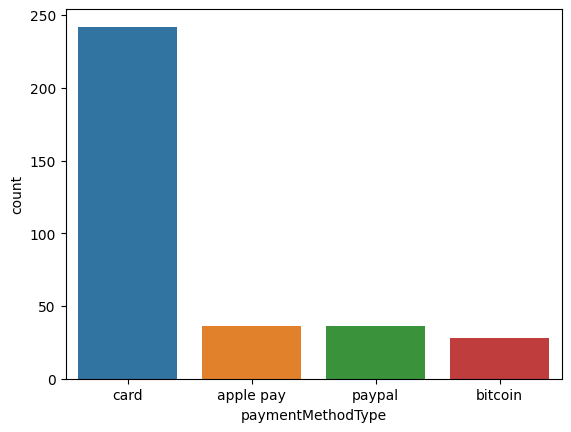

In [113]:
# Gráfico de barras de paymentMethodType ordenado por frecuencia
sns.countplot(x='paymentMethodType', data=data, order=data['paymentMethodType'].value_counts().index)

<Axes: ylabel='count'>

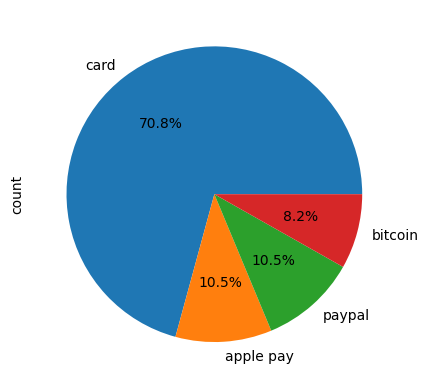

In [114]:
#grafico de torta de paymentMethodType en porcentaje
data['paymentMethodType'].value_counts().plot.pie(autopct='%1.1f%%')


In [115]:
# agrupacion para ver la cantidad de transacciones por tipo de metodo de pago
data.groupby('paymentMethodType')['transactionAmount'].agg(['count', 'mean', 'min', 'max']) # bivariado

,count,mean,min,max
paymentMethodType,,,,
apple pay,36,39.277778,10,353
bitcoin,28,35.250000,10,74
card,242,32.855372,10,75
paypal,36,38.388889,11,73


<Axes: xlabel='paymentMethodType', ylabel='transactionAmount'>

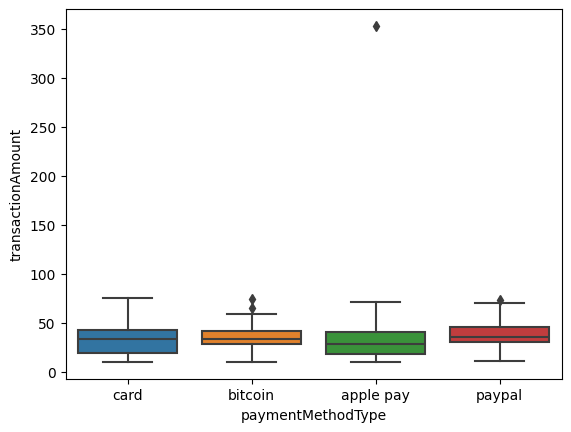

In [116]:
# graficar para ver la transacciones por tipo de metodo de pago
sns.boxplot(x='paymentMethodType',y='transactionAmount', data=data) # #bivariado

In [117]:
# crear un DataFrame con las frecuencias
frecuencias = data['paymentMethodType'].value_counts().reset_index()
frecuencias.columns = ['paymentMethodType', 'frecuencia']
frecuencias

,paymentMethodType,frecuencia
0,card,242
1,apple pay,36
2,paypal,36
3,bitcoin,28


In [118]:
#Query
filtro = frecuencias.query('frecuencia <=30')
filtro

,paymentMethodType,frecuencia
3,bitcoin,28


### - Conclusión 

- Los siguientes son los metodos de pago 'card', 'bitcoin', 'apple pay', 'paypal'
- Mayor metodo de pago es por tarjeta y el menor es Bitcoin con una frecuencia de menos de 500 transacciones por operación 
- 70.8% de las transacciones se hacen por tarjeta
- Hay un monto atipico en el pago con bitcoin, paypal y apple de 350 
- Tiene 281 valores nulos con un 45% de valores nulos


### Variable samecity y samestate

In [119]:
#cuenta los valores de la columna 'samecity'
data['samecity'].value_counts()

samecity
unknown    484
no         138
yes          1
Name: count, dtype: int64

In [120]:
#cuenta los valores de la columna 'samestate'
data['samestate'].value_counts()

samestate
unknown    484
no         137
yes          2
Name: count, dtype: int64

<Axes: xlabel='samecity'>

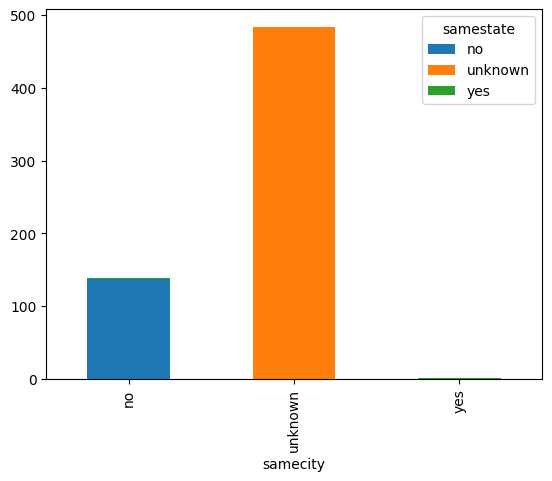

In [121]:
# Gráfico de barras apiladas para 'samecity' y 'samestate'
pd.crosstab(data['samecity'], data['samestate']).plot(kind='bar', stacked=True)


In [122]:
# crosstab para saber si mas fraudulentas si las ciudades no coinciden
pd.crosstab(data['samecity'], data['fraudulent'], normalize='index') * 100


fraudulent,False,True
samecity,,
no,61.594203,38.405797
unknown,72.413793,27.586207
yes,100.000000,0.000000


In [123]:
# crosstab para saber si mas fraudulentas si los estado no coinciden
pd.crosstab(data['samestate'], data['fraudulent'], normalize='index') * 100


fraudulent,False,True
samestate,,
no,62.043796,37.956204
unknown,72.413793,27.586207
yes,50.000000,50.000000


In [124]:
#cantidad, media, minimo y maximo de orderAmount por samecity
data.groupby('samecity')['orderAmount'].agg(['count', 'mean', 'min', 'max'])



,count,mean,min,max
samecity,,,,
no,138,36.456522,10.0,353.0
unknown,339,35.312684,10.0,75.0
yes,1,18.000000,18.0,18.0


In [125]:
#cantidad, media, minimo y maximo de orderAmount por state
data.groupby('samestate')['orderAmount'].agg(['count', 'mean', 'min', 'max'])

,count,mean,min,max
samestate,,,,
no,137,36.299270,10.0,353.0
unknown,339,35.312684,10.0,75.0
yes,2,38.000000,18.0,58.0


<Axes: xlabel='samecity', ylabel='count'>

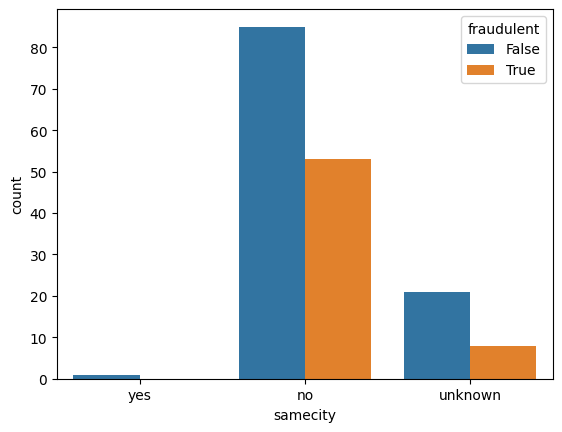

In [126]:
# graficos para saber si las transacciones son fraudulentas por ciudad
sns.countplot(data=data, x='samecity', hue='fraudulent')

<Axes: xlabel='samestate', ylabel='count'>

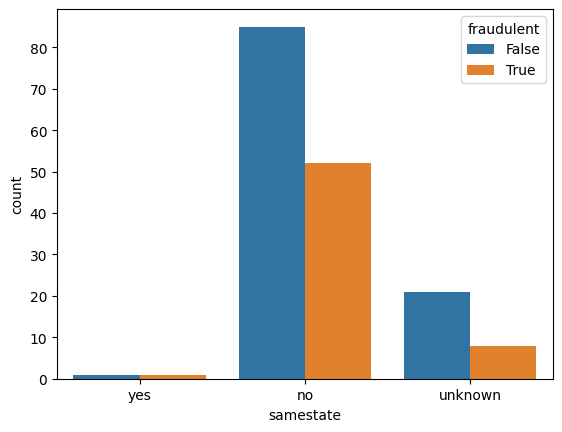

In [127]:
# graficos para saber si las transacciones son fraudulentas por estado
sns.countplot(data=data, x='samestate', hue='fraudulent')

### Conlusión

- Ambas variables samecity y samestate muestran una forma de detectar transacciones por montos y marcadas como fraudulentas, pero en este caso siendo mas robusta por city (samecity)
- Mayor riesgo cuando no coinciden las ciudades (no=38%)
- discrepancia en fraude cuando coincice la ciudad no hay fraude cuando coincide el estado en 50%
- Tasa elevada cuando no se sabe la información sobre las direccion con 72%


# AED 2 🤓

## 1- Variable fraudulent

In [128]:
#comprobar si hay datos nulos en la columna fraudulent
data['fraudulent'].isnull().sum()

455

In [129]:
# muestra de los valores unicos de la columna fraudulent
data['fraudulent'].unique()

array([False, True, nan], dtype=object)

In [130]:
# cuenta los valores de la columna 'fraudulent'
data['fraudulent'].value_counts()

fraudulent
False    107
True      61
Name: count, dtype: int64

<Axes: xlabel='fraudulent', ylabel='count'>

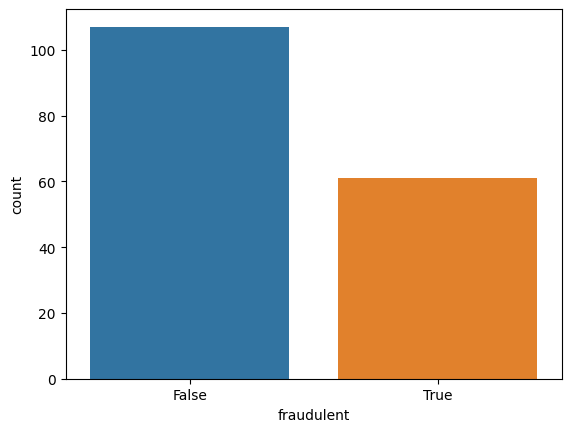

In [131]:
# grafico de barras de la columna 'fraudulent'
sns.countplot(x='fraudulent', data=data, order=data['fraudulent'].value_counts().index)

In [132]:
# frecuencia relativa de la columna 'fraudulent'
data['fraudulent'].value_counts(normalize=True)*100


fraudulent
False    63.690476
True     36.309524
Name: proportion, dtype: float64

<Axes: ylabel='count'>

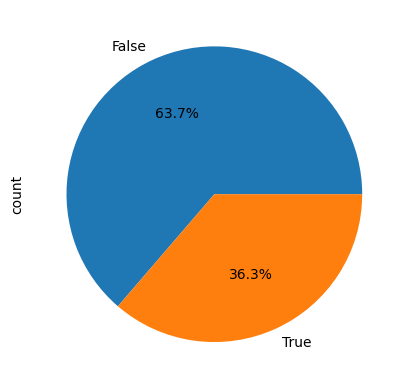

In [133]:
# grafico de torta de la columna 'fraudulent' en porcentaje
data['fraudulent'].value_counts().plot.pie(autopct='%1.1f%%')


### Conclusión
- La columna fraudulent se respresenta con dos valores True y Falso para indicar una transaccion fraudulenta hay valores nulos
- Se pudo constantar que no fraude ocupando el 33.7% son de las operaciones 

# 2- Análisis Bivariado

###  2.A)  Análisis de categórica vs. categórica
- `fraudulent` vs `transactionFailed`

In [134]:
# cantidad de valores nulos 
data['transactionFailed'].isnull().sum()

0

In [135]:
# que valores unicos tiene la columna 'transactionFailed'
data['transactionFailed'].unique()

array([False,  True])

In [136]:
# agrupar por 'fraudulent' y contar los valores normalizados de 'transactionFailed'
data.groupby('fraudulent')['transactionFailed'].value_counts(normalize=True) * 100


fraudulent  transactionFailed
False       False                68.224299
            True                 31.775701
True        False                72.131148
            True                 27.868852
Name: proportion, dtype: float64

In [137]:
# crosstab para ver la relacion entre 'fraudulent' y 'transactionFailed'
pd.crosstab(data['fraudulent'], data['transactionFailed'])


transactionFailed,False,True
fraudulent,,
False,73,34
True,44,17


<Axes: xlabel='transactionFailed', ylabel='count'>

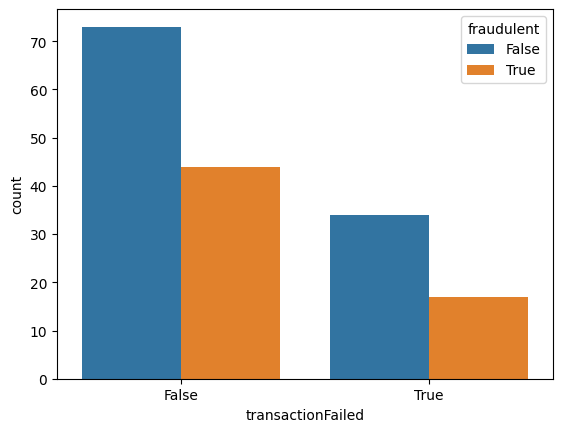

In [138]:
# graficos para ver la relacion entre 'fraudulent' y 'transactionFailed'
sns.countplot(data=data, x='transactionFailed', hue='fraudulent')

- fraudulent vs paymentMethodRegistrationFailure

<Axes: xlabel='fraudulent', ylabel='count'>

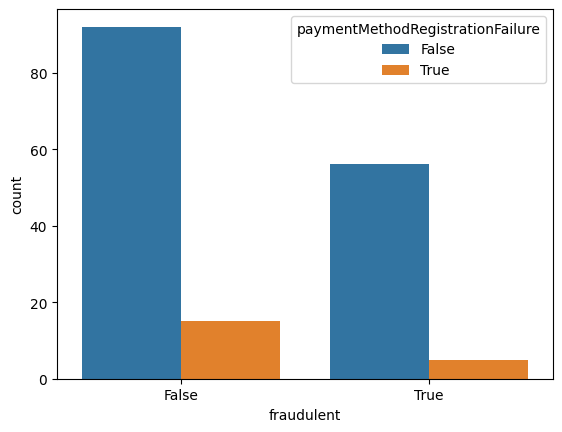

In [139]:
sns.countplot(data=data, x='fraudulent', hue='paymentMethodRegistrationFailure')

### Conclusión
- La mayoria de las transacciones fraudulentas no fallan con 72.1 %, lo que indica que los fraudes tienden a pasar sin ser bloqueados
- El porcentaje de transacciones fallidas es más bajo en operaciones fraudulentas (27.9%) que en las legítimas (31.8%), lo que podría indicar que el sistema tiende a fallar más en transacciones legítimas que en las fraudulentas.
- El fallo en el registro del método de pago (paymentMethodRegistrationFailure) es poco frecuente en general y aún menos común en transacciones fraudulentas.

### 2.B) Análisis de numérica vs. categórica

- `fraudulent` vs `transactionAmount`

In [140]:
# tipo de datos de la columna 'transactionAmount'
data['transactionAmount'].dtype

dtype('int64')

In [141]:
# datos nulos en la columna 'transactionAmount'
data['transactionAmount'].isnull().sum()

0

<Axes: >

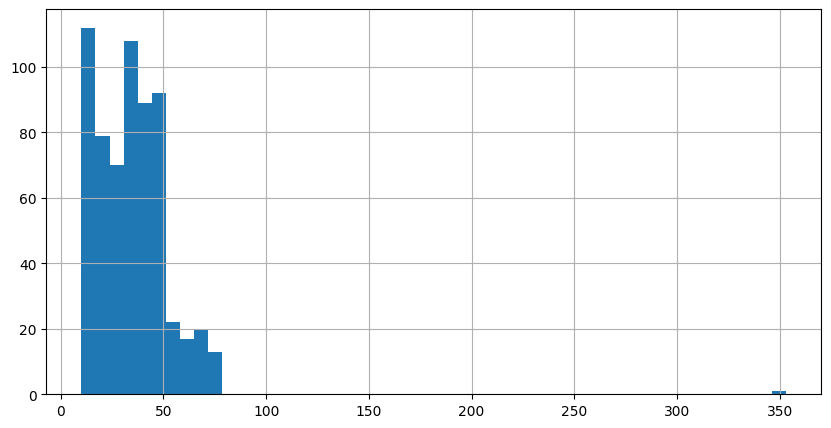

In [142]:
# histograma de la columna 'transactionAmount'
data['transactionAmount'].hist(bins=50, figsize=(10, 5))

In [143]:
# agrupacion para ver la cantidad, media, minimo y maximo de 'transactionAmount' por 'fraudulent'
data.groupby('fraudulent')['transactionAmount'].agg(['count', 'mean', 'min', 'max'])

,count,mean,min,max
fraudulent,,,,
False,107,33.373832,10,75
True,61,30.950820,10,69


In [144]:
data['transactionAmount'].describe()

count    623.000000
mean      34.598716
std       20.360247
min       10.000000
25%       21.000000
50%       34.000000
75%       45.000000
max      353.000000
Name: transactionAmount, dtype: float64

In [145]:
#identificacion del monto
data[data['transactionAmount'] == 353]


,orderAmount,orderState,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,paymentMethodIssuer,transactionAmount,transactionFailed,fraudulent,samecity,samestate,emailDomain,emailProvider,customerIPAddressSimplified
189,25.0,fulfilled,True,apple pay,Voyager,Bastion Banks,353,True,NaN,unknown,unknown,weird,weird,only_letters


<Axes: xlabel='fraudulent', ylabel='transactionAmount'>

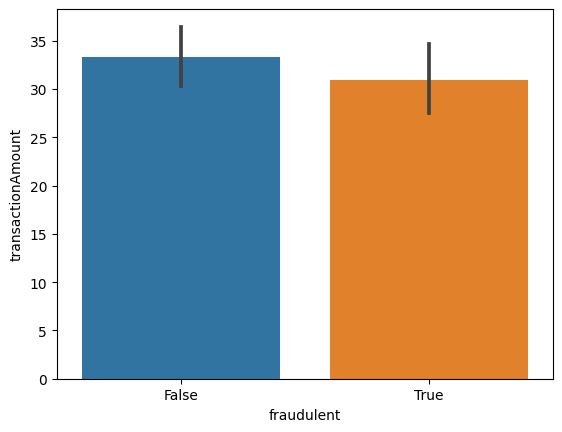

In [146]:
# grafico de barras de 'transactionAmount' por 'fraudulent' y ver la media de 'transactionAmount' por 'fraudulent'
sns.barplot(x='fraudulent', y='transactionAmount', data=data)

### Conclusión 
- Se para la columna 'transactionAmount' que la distribucion está sesgada hacia la derecha, lo que indica que no es una distribucion normal estandar con outlier
- el maximo de 'transactionAmount' es de 353 que no es detectada en el caso de los casos fraudulentos y pertenece al tipo de pago apple pay

### 2.C) Análisis de numérica vs numérica
- orderAmount vs transactionAmount

In [147]:
data['transactionAmount'].isnull().sum()

0

In [148]:
data['orderAmount'].isnull().sum()

145

In [149]:
# estadisticas descriptivas de varibles numericas
data.describe()

,orderAmount,transactionAmount
count,478.000000,623.000000
mean,35.606695,34.598716
std,21.667298,20.360247
min,10.000000,10.000000
25%,22.000000,21.000000
50%,35.000000,34.000000
75%,46.000000,45.000000
max,353.000000,353.000000


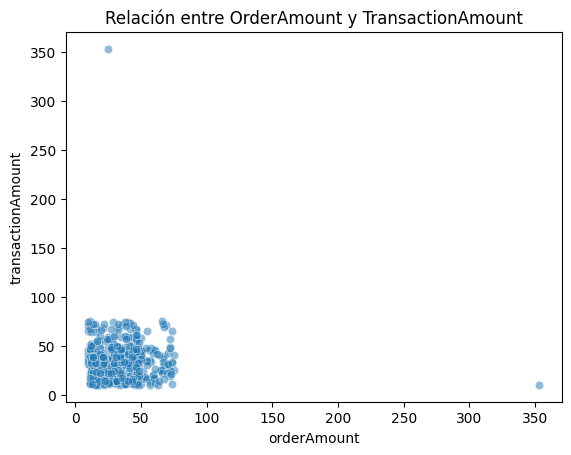

In [150]:
# Grafico de dispersión para ver la relación entre 'orderAmount' y 'transactionAmount'
sns.scatterplot(x='orderAmount', y='transactionAmount', data=data, alpha=0.5)
plt.title('Relación entre OrderAmount y TransactionAmount')
plt.show()

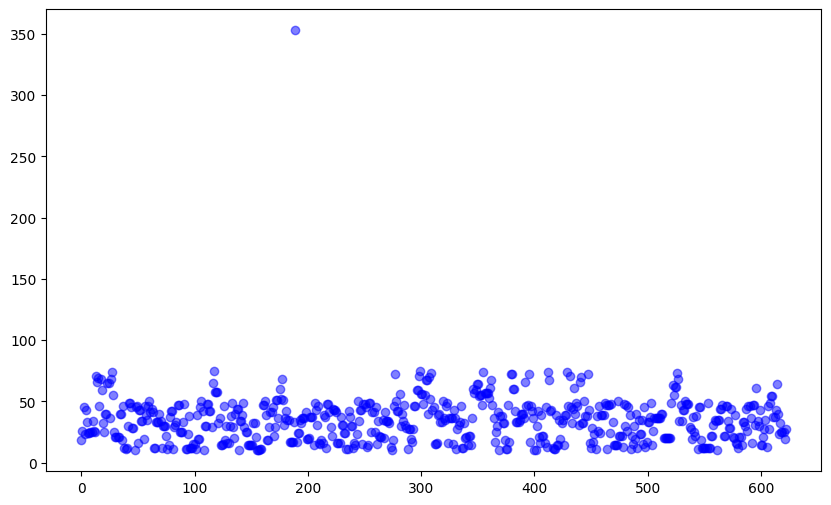

In [151]:
# Grafico de dispersion para las transacciones y el monto de la transaccion
plt.figure(figsize=(10, 6))
plt.scatter(range(len(data)), data['transactionAmount'], c='blue', alpha=0.5)

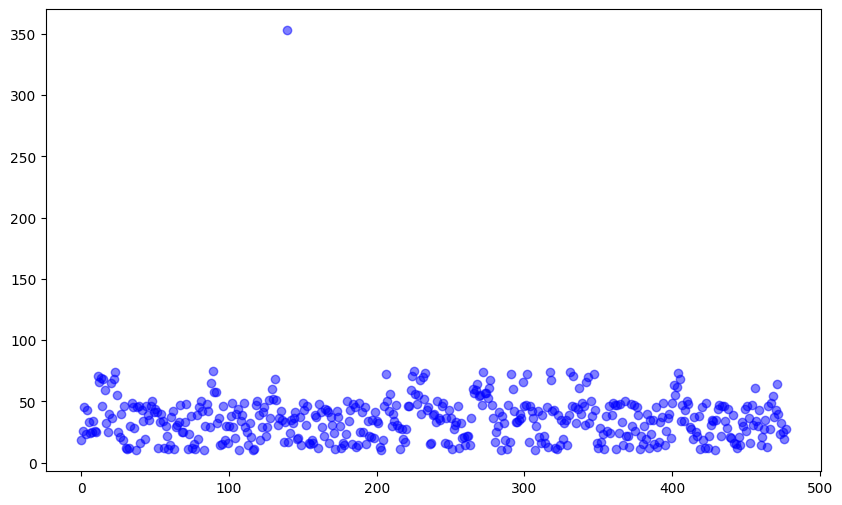

In [152]:
# Grafico de dispersion para las transaccione y el monto de la orden

plt.figure(figsize=(10, 6))
plt.scatter(range(len(data)), data['orderAmount'], c='blue', alpha=0.5)

In [153]:
# la correlación entre 'orderAmount' y 'transactionAmount'
data[['orderAmount', 'transactionAmount']].corr()


,orderAmount,transactionAmount
orderAmount,1.000000,-0.077408
transactionAmount,-0.077408,1.000000


In [154]:
# calcular la diferencia entre 'orderAmount' y 'transactionAmount', calcula estadísticas descriptivas de esta diferencia
data['difference'] = data['orderAmount'] - data['transactionAmount']
data['difference'].describe()

count    478.000000
mean       0.280335
std       31.951432
min     -328.000000
25%      -16.000000
50%        0.000000
75%       16.000000
max      343.000000
Name: difference, dtype: float64

In [155]:
# mostrar las primeras 10 filas con diferencia entre 'orderAmount' y 'transactionAmount'
data[['orderAmount', 'transactionAmount', 'difference']].sort_values('difference').head(10)


,orderAmount,transactionAmount,difference
189,25.0,353,-328.0
117,11.0,75,-64.0
429,10.0,74,-64.0
307,10.0,70,-60.0
395,14.0,72,-58.0
380,15.0,72,-57.0
362,11.0,67,-56.0
116,10.0,65,-55.0
350,12.0,64,-52.0
177,16.0,68,-52.0


<Axes: >

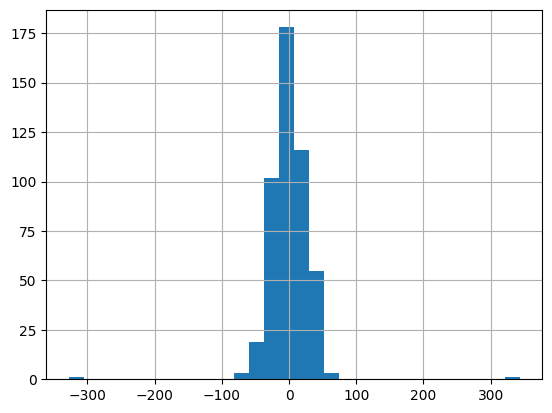

In [156]:
# histograma para ver como se distribuye la diferencia entre 'orderAmount' y 'transactionAmount'
data['difference'].hist(bins=30)

In [157]:
# casos donde se pagó más de lo ordenado
data[data['difference'] < 0] 


,orderAmount,orderState,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,paymentMethodIssuer,transactionAmount,transactionFailed,fraudulent,samecity,samestate,emailDomain,emailProvider,customerIPAddressSimplified,difference
10,25.0,fulfilled,False,card,Voyager,Grand Credit Corporation,34,False,True,no,no,com,yahoo,only_letters,-9.0
13,69.0,failed,False,apple pay,VISA 16 digit,His Majesty Bank Corp.,71,False,False,no,no,com,other,only_letters,-2.0
14,46.0,fulfilled,False,card,JCB 16 digit,Bastion Banks,66,True,False,no,no,info,other,digits_and_letters,-20.0
15,68.0,fulfilled,False,card,VISA 13 digit,Grand Credit Corporation,69,False,True,no,no,com,gmail,only_letters,-1.0
17,32.0,fulfilled,False,paypal,JCB 15 digit,B,68,False,False,no,no,com,other,only_letters,-36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,35.0,fulfilled,NaN,NaN,NaN,NaN,47,False,NaN,unknown,unknown,weird,weird,only_letters,-12.0
465,46.0,fulfilled,NaN,NaN,NaN,NaN,47,True,NaN,unknown,unknown,weird,weird,only_letters,-1.0
466,27.0,fulfilled,NaN,NaN,NaN,NaN,47,False,NaN,unknown,unknown,weird,weird,only_letters,-20.0
474,32.0,fulfilled,NaN,NaN,NaN,NaN,50,False,NaN,unknown,unknown,weird,weird,only_letters,-18.0


In [158]:
# casos marcados como  fraudulento con la diferencia 
data[(data['difference'] < 0) & (data['fraudulent'] == True)]


,orderAmount,orderState,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,paymentMethodIssuer,transactionAmount,transactionFailed,fraudulent,samecity,samestate,emailDomain,emailProvider,customerIPAddressSimplified,difference
10,25.0,fulfilled,False,card,Voyager,Grand Credit Corporation,34,False,True,no,no,com,yahoo,only_letters,-9.0
15,68.0,fulfilled,False,card,VISA 13 digit,Grand Credit Corporation,69,False,True,no,no,com,gmail,only_letters,-1.0
32,12.0,fulfilled,False,card,VISA 16 digit,Her Majesty Trust,21,True,True,no,no,weird,weird,digits_and_letters,-9.0
57,30.0,fulfilled,False,bitcoin,JCB 16 digit,Her Majesty Trust,39,False,True,no,no,com,gmail,only_letters,-9.0
60,14.0,fulfilled,False,card,JCB 16 digit,Fountain Financial Inc.,50,False,True,no,no,com,other,only_letters,-36.0
62,42.0,fulfilled,False,card,VISA 16 digit,Fountain Financial Inc.,44,False,True,no,no,weird,weird,digits_and_letters,-2.0
68,25.0,fulfilled,False,card,Maestro,Bastion Banks,33,False,True,no,no,com,other,digits_and_letters,-8.0
79,19.0,fulfilled,False,card,VISA 13 digit,His Majesty Bank Corp.,42,True,True,no,no,com,gmail,only_letters,-23.0
83,10.0,fulfilled,False,paypal,JCB 16 digit,Citizens First Banks,31,False,True,unknown,unknown,org,other,digits_and_letters,-21.0
84,30.0,fulfilled,False,apple pay,JCB 16 digit,Citizens First Banks,33,False,True,unknown,unknown,com,other,only_letters,-3.0


In [159]:

data.groupby('transactionFailed')['difference'].mean()*100

transactionFailed
False    72.285714
True    -92.968750
Name: difference, dtype: float64

In [160]:
data[data['orderAmount'] == 353]


,orderAmount,orderState,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,paymentMethodIssuer,transactionAmount,transactionFailed,fraudulent,samecity,samestate,emailDomain,emailProvider,customerIPAddressSimplified,difference
139,353.0,fulfilled,True,card,Maestro,Citizens First Banks,10,False,False,no,no,com,other,digits_and_letters,343.0


In [161]:
#borrar la columna 'difference'
data.drop(columns=['difference'], inplace=True)

### Conclusión
- Hay una correlacion negativa entre las dos variables esto puede ser por factores que afecten el monto final
- hay un monto con 353 no fue rechazado (outlier)
- Al comparar los montos se observa que hay montos negativos pudiendo indicar que se cobro mas de lo que se facturo posible fraude
-  con 92.9% las transacciones fallan cuando el monto de transaccion el mayor


# Promedios

In [162]:
# Seleccionamos solo columnas categóricas
cat_cols = data.select_dtypes(include='object').columns


In [163]:
# Calculamos el promedio de transactionAmount por cada categoría de cada variable
for col in cat_cols:
    print(f"\nPromedio de transactionAmount por: {col}")
    print(data.groupby(col)['transactionAmount'].mean().sort_values(ascending=False))


Promedio de transactionAmount por: orderState
orderState
fulfilled    35.645000
failed       33.880000
pending      33.357143
Name: transactionAmount, dtype: float64

Promedio de transactionAmount por: paymentMethodRegistrationFailure
paymentMethodRegistrationFailure
True     39.925000
False    33.566225
Name: transactionAmount, dtype: float64

Promedio de transactionAmount por: paymentMethodType
paymentMethodType
apple pay    39.277778
paypal       38.388889
bitcoin      35.250000
card         32.855372
Name: transactionAmount, dtype: float64

Promedio de transactionAmount por: paymentMethodProvider
paymentMethodProvider
Voyager                        42.583333
Discover                       37.120000
Mastercard                     36.473684
VISA 13 digit                  35.218750
JCB 15 digit                   34.600000
American Express               34.272727
VISA 16 digit                  33.578947
Maestro                        33.468750
Diners Club / Carte Blanche    32.794118


# 3)Graficos en AED


## 3.A) Análisis de numérica vs. categórica
- transactionAmount vs transactionFailed

<Axes: xlabel='transactionFailed', ylabel='transactionAmount'>

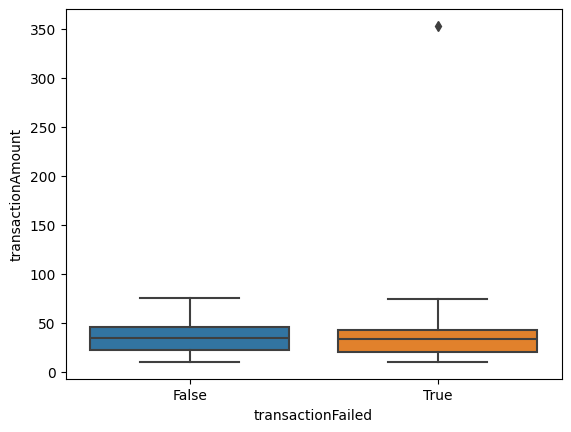

In [164]:
sns.boxplot(x='transactionFailed', y='transactionAmount', data=data)

# Conlcusión 
- Se observa una transaccion por el orde de los 353 detectada anteriormente y mostrada a traves de un boxplot, eso puede indenficarse como un outlier
- Lo datos de las medias estan casi iguales

## 3.B) Análisis de categórica vs. categórica
Consideren x="paymentMethodType" y col="orderState"

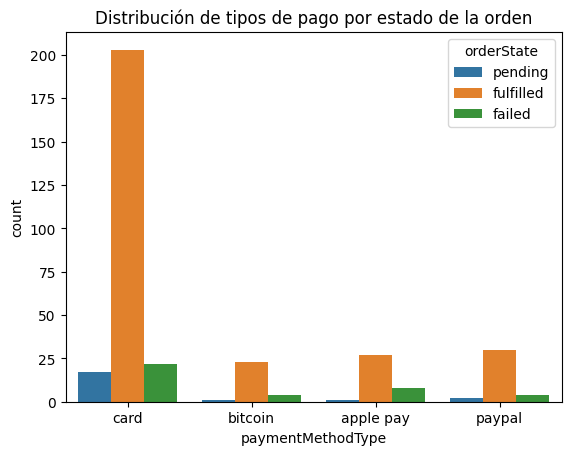

In [165]:
sns.countplot(data=data, x='paymentMethodType', hue='orderState')
plt.title("Distribución de tipos de pago por estado de la orden")
plt.show()


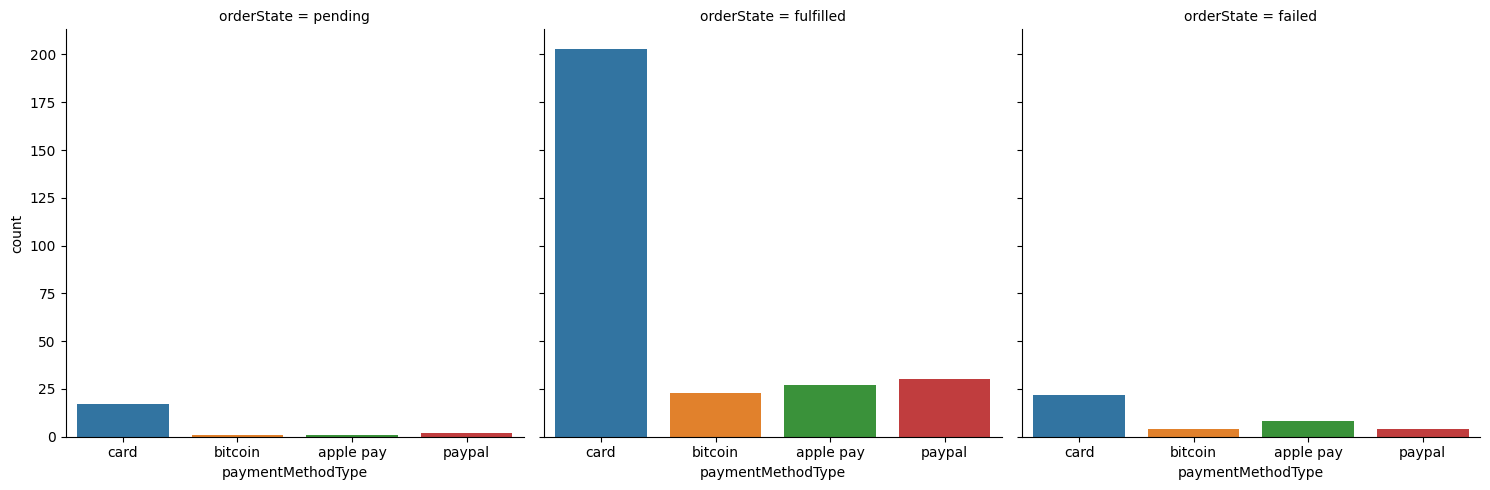

In [166]:
 sns.catplot(x="paymentMethodType",col="orderState",data= data,kind="count")

#  Conclusión 
- Se tiene un mayor ordenes completadas,pendientes y que fallaron con el tipo de pago tarjeta, siendo el mas comun se podria interpretar que hay mas riesgo con este tipo de pago
- Siendo en menor porporcion bitcoin, applepay y paypal son las orderes que menos fallan
- Se observa una relacion entre el tipo de pago y la probilidad de que falle
- En menor proporcion pero catalogadas como pending este tipo de ordenes quedan sujetas para saber si son fraudulentas o no

# Correlación 

In [167]:
data_aux = data[["orderAmount", "transactionAmount"]].copy()

<Axes: >

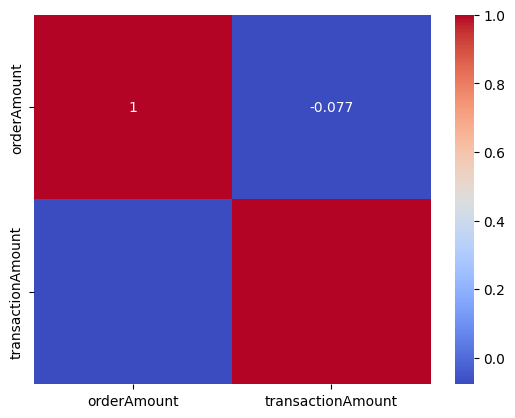

In [168]:
sns.heatmap(data_aux.corr(), annot=True, cmap="coolwarm")

c:\Users\tomasito\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tomasito\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


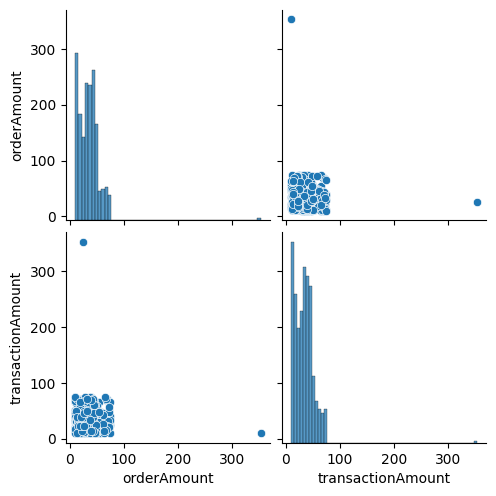

In [174]:
sns.pairplot(data_aux)

### Conclusión 
- Vemos una correlacion negativa entre las dos variables orderAmount y transaction, lo que puede indicar una variacion en el precio final


- No hay una separación visual evidente entre los valores de fraudulent y los montos, lo cual indica que la detección de fraude no depende únicamente de montos altos.
- La variable transactionFailed sí tiene agrupaciones un poco más notorias en transactionAmount, lo cual podría sugerir algún patrón de fallo según el valor.

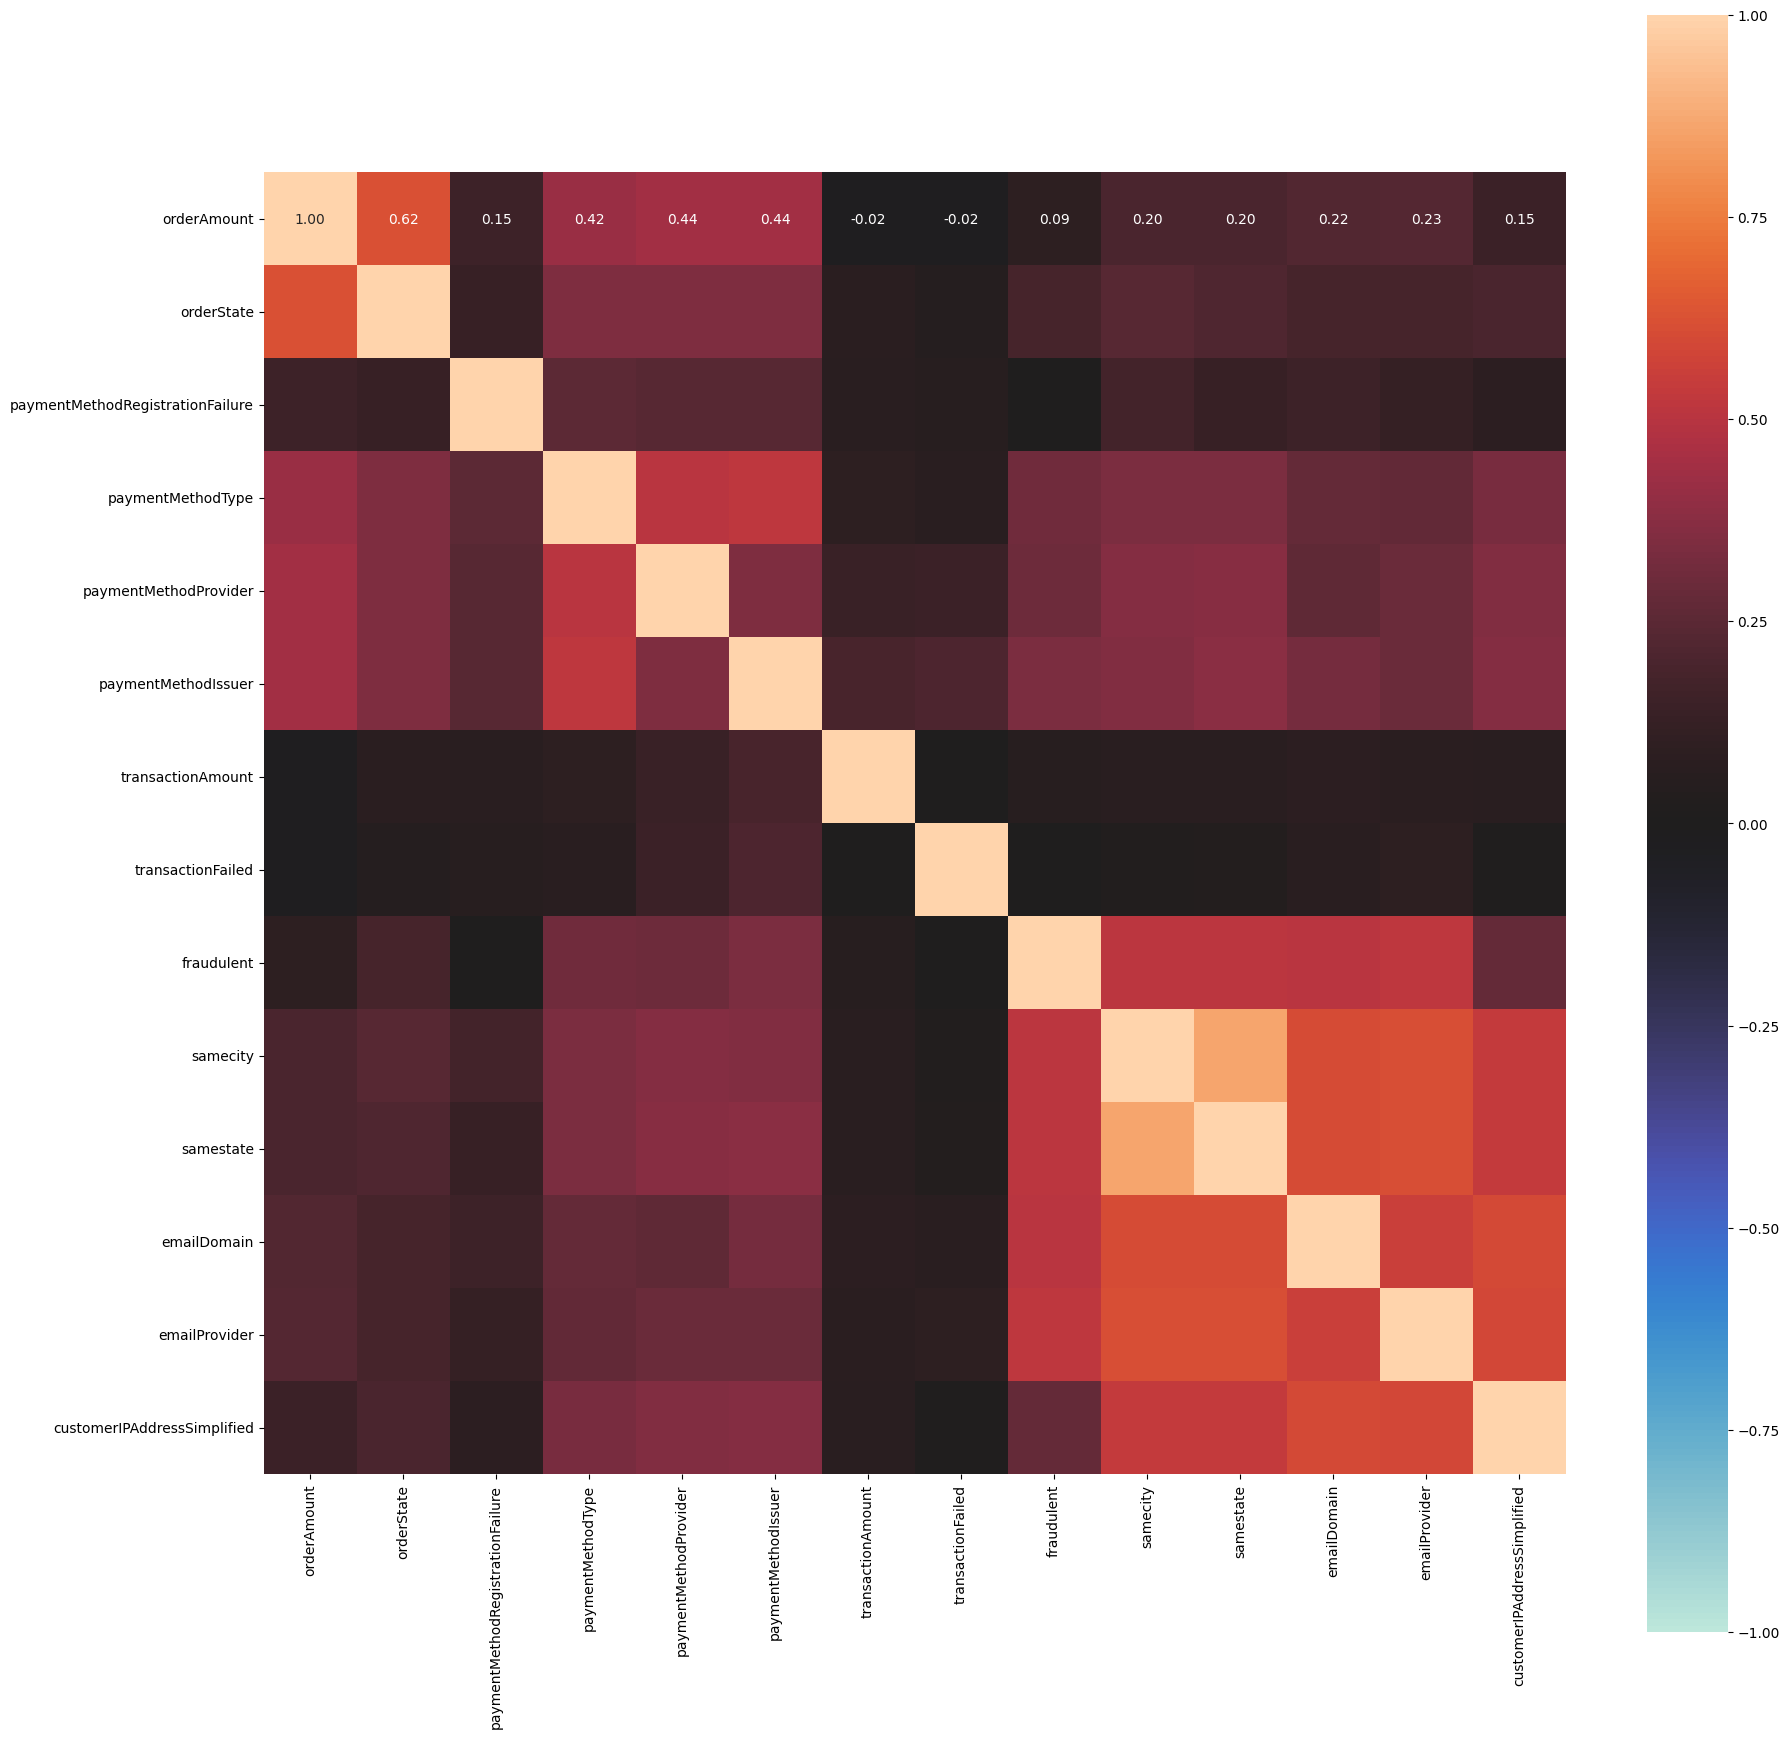

{'corr':                                   orderAmount  orderState  \
 orderAmount                          1.000000    0.621743   
 orderState                           0.621743    1.000000   
 paymentMethodRegistrationFailure     0.152648    0.128300   
 paymentMethodType                    0.420598    0.350042   
 paymentMethodProvider                0.441184    0.344955   
 paymentMethodIssuer                  0.439682    0.346045   
 transactionAmount                   -0.016651    0.072122   
 transactionFailed                   -0.015939    0.045496   
 fraudulent                           0.093386    0.186948   
 samecity                             0.201672    0.239031   
 samestate                            0.199400    0.218658   
 emailDomain                          0.223249    0.183922   
 emailProvider                        0.227028    0.185183   
 customerIPAddressSimplified          0.148180    0.195327   
 
                                   paymentMethodRegistration

In [169]:
from dython.nominal import associations

associations(data, nominal_columns='auto',plot=True)


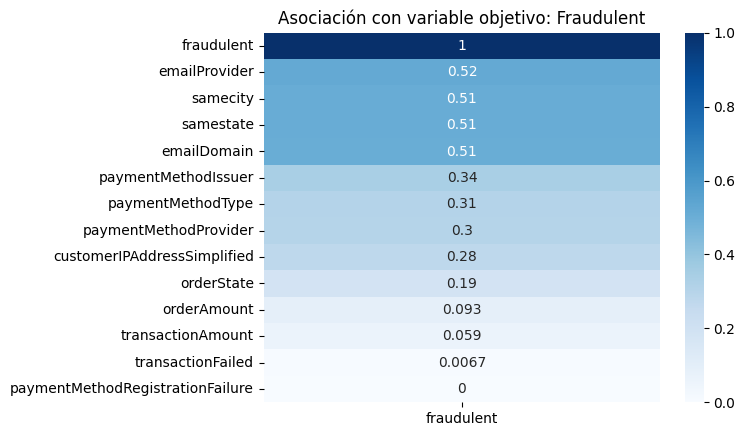

In [170]:
df_corr = associations(data, nominal_columns='auto', plot=False)["corr"]
sns.heatmap(df_corr[["fraudulent"]].sort_values(by="fraudulent", ascending=False), annot=True, cmap="Blues")
plt.title("Asociación con variable objetivo: Fraudulent")
plt.show()


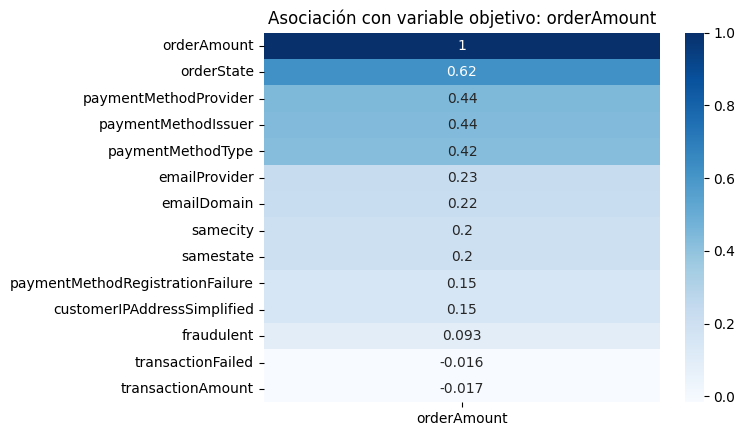

In [171]:
sns.heatmap(df_corr[["orderAmount"]].sort_values(by="orderAmount", ascending=False), annot=True, cmap="Blues")
plt.title("Asociación con variable objetivo: orderAmount")
plt.show()

#  Conclusiones correlación 

- emailDomain (0.51) y emailProvider (0.51): El dominio del correo y el proveedor son indicativos de riesgo.

- paymentMethodIssuer (0.34): Determinadas emisoras/proveedores de pago se relacionan con fraude.

- paymentMethodType (0.34): Ciertos tipos de método de pago podrían facilitar el fraude.

- samecity y samestate (0.51): La coincidencia entre ciudad y estado de origen podría influir posiblemente por casos de identidad falsa. 

- orderAmount  y transactionAmount (-0.017) estan correlacionadas negativamente lo cual resulta llamativo habiando investigado que hay montos de transaccion mayores a los de la orden

- OrderState y ordenAmount siendo la correlacion mas elevada, lo que puede inferir que ciertos estados estan ligadas con ordenes mas grandes